# Lab 6: Training Deep Recurrent Neural Network


## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [8]:
# Import require library
from keras import *
from keras.preprocessing import text,sequence

from sklearn.model_selection import train_test_split

import _utils as fn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [12]:
# import data
dataframe = pd.read_csv('data/emoji_data.csv')
dataframe.head(5)


,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [13]:
# Split features and target
X = dataframe['sentence'].values
y = dataframe['emoji'].values


### Split train test

In [17]:
# Split train test
X_train,X_test, y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.1,
                                                 stratify = y,
                                                 random_state = 0)

# Split train validate
X_train,X_val, y_train,y_val = train_test_split(X_train,y_train,
                                                 test_size = 0.1,
                                                 stratify = y_train,
                                                 random_state = 0)


Text(0.5,1,'y test')

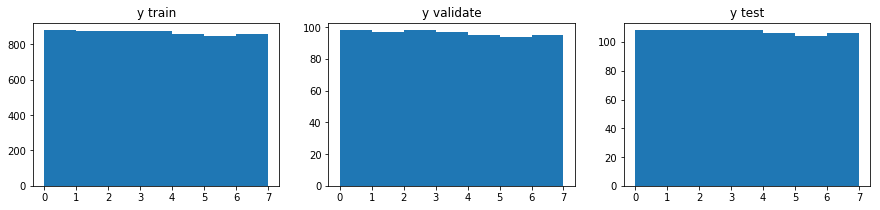

In [19]:
# Plot target distribution
fig, ax = plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins = bins)
ax[0].set_title('y train')

ax[1].hist(y_val,bins = bins)
ax[1].set_title('y validate')

ax[2].hist(y_test,bins = bins)
ax[2].set_title('y test')

In [20]:
# Show example input
X_train[0]

'I was at a boarding school during my primary school days. I was broken so I pretended I was very sick. My father came and he picked me up. He spent a lot of money on medical expenses which all proved to be negative.'

In [21]:
# Lenght of example input sentence
len(X_train[0].split())

44

In [22]:
y_train[0]

6

### Preprocess data: Tokenizer & Padding

In [23]:
# Define parameter
max_words = 5000
max_features = 5000
maxlen =20


In [24]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [25]:
tokenizer

In [54]:
# Preprocess data function
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen=maxlen)
    return padding_sequences

In [55]:
# Preprocess data
X_train = preprocess_fn(X_train)
X_val = preprocess_fn(X_val)
X_test = preprocess_fn(X_test)

### Build a model with word embedding

In [56]:
# Define model
rnn = models.Sequential()

rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.LSTM(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [58]:
# Compile model
rnn.compile(optimizer='rmsprop',
           loss='sparse_categorical_crossentropy',
           metrics=['acc'])

In [59]:
# Show model structure
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 170,887
Trainable params: 170,887
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define callbacks


In [60]:
# Fit model
history = rnn.fit(X_train,y_train,
                 batch_size=32,
                 epochs=5,
                 validation_data=(X_val,y_val))

Train on 6058 samples, validate on 674 samples
Epoch 1/5
6058/6058 [==============================] - 51s 8ms/step - loss: 1.8691 - acc: 0.2278 - val_loss: 1.7547 - val_acc: 0.2967
Epoch 2/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.5314 - acc: 0.4137 - val_loss: 1.5495 - val_acc: 0.3917
Epoch 3/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.2802 - acc: 0.5274 - val_loss: 1.4699 - val_acc: 0.4881
Epoch 4/5
6058/6058 [==============================] - 9s 1ms/step - loss: 1.0927 - acc: 0.6055 - val_loss: 1.5003 - val_acc: 0.5015
Epoch 5/5
6058/6058 [==============================] - 9s 2ms/step - loss: 0.9557 - acc: 0.6639 - val_loss: 1.4733 - val_acc: 0.5045


Last train accuracy: 0.6639154836973289
Last validation accuracy: 0.5044510385756676


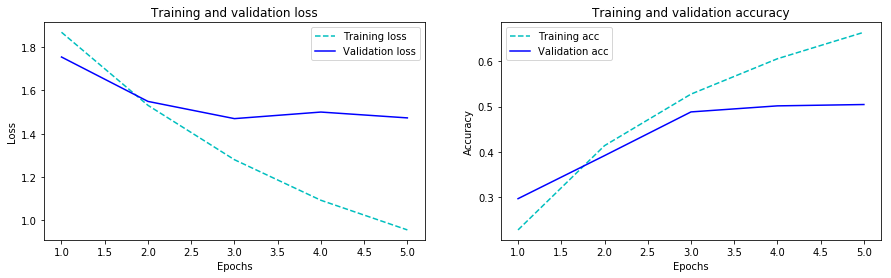

In [61]:
# Plot accuracy and loss over each epochs
fn.show_result(history)

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [62]:
# Preprocess test data
rnn.evaluate(X_test,y_test)

748/748 [==============================] - 0s 604us/step


[1.4863043704772378, 0.4879679147572441]

In [63]:
# Evaluate model with test data
fn.evaluation_report(rnn,X_test,y_test)

[[75  3  4 16  6  0  4]
 [ 5 58  3 19  7  3 13]
 [10  3 29 17 15 14 20]
 [ 6  3  4 71  3  3 18]
 [ 4  4 10 16 55  5 12]
 [ 5  5 11 19  5 29 30]
 [ 1  2  9 24  2 20 48]]
             precision    recall  f1-score   support

          0       0.71      0.69      0.70       108
          1       0.74      0.54      0.62       108
          2       0.41      0.27      0.33       108
          3       0.39      0.66      0.49       108
          4       0.59      0.52      0.55       106
          5       0.39      0.28      0.33       104
          6       0.33      0.45      0.38       106

avg / total       0.51      0.49      0.49       748

Loss: 1.4863043704772378 Accuracy: 0.4879679147572441


array([1, 6, 3, 2, 5, 3, 0, 3, 3, 1, 4, 3, 3, 4, 6, 1, 3, 6, 4, 6, 4, 0,
       4, 6, 3, 4, 3, 1, 6, 2, 3, 2, 6, 4, 3, 0, 6, 6, 6, 3, 0, 4, 6, 5,
       4, 6, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 1, 3, 6, 0, 1, 0, 0, 0, 6,
       6, 2, 3, 0, 4, 4, 1, 0, 3, 4, 5, 3, 6, 6, 5, 2, 3, 0, 5, 6, 6, 2,
       2, 3, 6, 1, 5, 6, 0, 3, 3, 3, 5, 6, 2, 4, 5, 3, 5, 1, 0, 0, 0, 3,
       6, 6, 3, 5, 0, 1, 5, 4, 3, 6, 1, 6, 6, 4, 0, 4, 0, 0, 2, 4, 5, 5,
       3, 6, 1, 0, 4, 5, 4, 1, 3, 0, 6, 3, 6, 2, 5, 5, 3, 1, 1, 0, 3, 1,
       0, 3, 0, 3, 4, 4, 3, 6, 4, 0, 3, 3, 2, 6, 2, 3, 5, 0, 4, 0, 3, 5,
       2, 5, 1, 4, 5, 3, 1, 5, 0, 6, 0, 6, 6, 3, 0, 3, 3, 3, 0, 3, 2, 4,
       4, 2, 6, 4, 5, 3, 5, 5, 5, 2, 1, 1, 0, 2, 3, 0, 5, 3, 3, 5, 6, 6,
       6, 3, 4, 1, 2, 2, 4, 0, 6, 4, 2, 0, 3, 0, 1, 6, 5, 6, 6, 1, 6, 2,
       3, 3, 3, 2, 0, 1, 2, 2, 6, 4, 2, 2, 3, 6, 4, 3, 3, 6, 4, 0, 3, 6,
       6, 4, 6, 6, 6, 6, 4, 0, 2, 6, 3, 3, 1, 6, 3, 6, 2, 0, 1, 1, 5, 3,
       6, 2, 6, 0, 3, 4, 0, 5, 0, 6, 5, 6, 0, 1, 6,

In [ ]:
# Show confusino matrix and prediction report

### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [64]:
# Define predict function
def predict_emoji(input_text,models):
    prepro_input = preprocess_fn([input_text])
    
    pred_class = rnn.predict(prepro_input).argmax(axis=1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞',]
    
    result = label_to_emoji[int(pred_class)]
    print('%s %s'%(input_text,result))
    

In [74]:
# Test your model
predict_emoji('I am hungry',rnn)

I am hungry 😭
